# Customer Lifetime Value Dataset

## Overview
This dataset contains customer transaction and marketing data from an e-commerce business. It was collected to study the relationship between marketing efforts, customer behavior, and revenue generation. The goal is to predict each customer’s lifetime value (CLV) based on their interaction with different marketing channels, spending patterns, and conversion rates.

Customer Lifetime Value (CLV) is a key metric in business analytics that estimates the total revenue a company can expect from a customer throughout their relationship. Understanding CLV helps businesses allocate marketing budgets more effectively, prioritize high-value customer segments, and design strategies for long-term retention and profitability. In this project, we will perform a comprehensive exploratory data analysis (EDA) on an e-commerce dataset to uncover patterns in customer behavior, marketing efficiency, and revenue generation. Our goal is to calculate and predict CLV using features such as marketing channel, cost, conversion rate, and revenue, and to derive actionable insights that can guide smarter business decisions.

## Columns:
- customer_id – Unique identifier for each customer.
- channel – Marketing channel the customer interacted with (e.g., email, social media, direct).
- cost – The cost spent on acquiring or marketing to this customer.
- conversion_rate – The ratio of successful transactions to total interactions for this customer.
- revenue – Total revenue generated by this customer.


## Key Points:
- Data Type Variety: Includes categorical data (channel) and numeric data (cost, conversion_rate, revenue).
- Business Relevance: Focused on e-commerce revenue and marketing efficiency.
- Target Variable: We can calculate CLV as revenue minus cost, or just use revenue as a proxy for CLV.


## Potential Insights:
- Which marketing channels bring the most valuable customers?
- Relationship between marketing spend and customer revenue.
- Customer segmentation by CLV.
- How conversion rate affects revenue.


## Why it’s interesting & Goal:
This dataset allows exploration of customer behavior, marketing effectiveness, and revenue prediction, which is highly relevant for entrepreneurship and business strategy. The goal is to predict Customer Lifetime Value (CLV) and provide actionable insights to optimize marketing and retention strategies.


### Link: https://www.kaggle.com/datasets/bhanupratapbiswas/customer-lifetime-value-analytics-case-study

## Imports libraries for data manipulation, numerical analysis, and visualization

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from matplotlib.patches import Patch
from plotly.subplots import make_subplots

## Call data frame, and cheak the data

In [76]:
data = pd.read_csv('customer_acquisition_data.csv')
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


## Explore the data to know the data type, and if there is null, the columns name, the columns type

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


## Explore descriptive statistics for both numerical and categorical columns in the dataset.

In [78]:
data.describe()

,customer_id,cost,conversion_rate,revenue
count,800.0000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250
std,231.0844,9.922337,0.059611,1259.543706
min,1.0000,5.246263,0.016341,500.000000
25%,200.7500,5.246263,0.043822,1694.000000
50%,400.5000,8.320327,0.043822,2764.000000
75%,600.2500,9.546326,0.123145,3824.250000
max,800.0000,30.450327,0.167592,4998.000000


In [79]:
data.describe(include='object')

,channel
count,800
unique,4
top,email marketing
freq,214


## Nulls check

In [80]:
data.isnull().sum()

,0
customer_id,0
channel,0
cost,0
conversion_rate,0
revenue,0


## Show the values for each column

In [81]:
data['channel'].value_counts()

,count
channel,
email marketing,214
referral,207
paid advertising,194
social media,185


Show balanced

In [82]:
data['conversion_rate'].value_counts()

,count
conversion_rate,
0.043822,214
0.123145,207
0.016341,194
0.167592,185


In [83]:
data['customer_id'].value_counts()

,count
customer_id,
784,1
783,1
782,1
781,1
780,1
...,...
5,1
4,1
3,1


In [84]:
data['cost'].value_counts()

,count
cost,
5.246263,214
8.320327,207
30.450327,194
9.546326,185


In [85]:
data['revenue'].value_counts()

,count
revenue,
1303,3
2949,3
4947,3
3436,3
3326,3
...,...
1171,1
4155,1
3175,1


### Each feature show that its balanced between its elements

## Start EDA

In [86]:
import plotly.express as px

fig = px.scatter(
    data, x='cost', y='revenue', color='channel',
    hover_data=['customer_id', 'conversion_rate'],
    title='Cost vs Revenue by Marketing Channel'
)
fig.show()

### This plot shows how much money was spent on each customer and how much money they brought in, grouped by marketing channel. Most channels like referral, email marketing, and social media cost less but still bring in high revenue. Paid advertising costs a lot more but doesn’t bring in extra revenue compared to the others. This means spending more doesn’t always lead to better results, and it’s smarter to focus on the cheaper channels that still perform well.

In [87]:
fig = px.scatter(
    data, x='conversion_rate', y='revenue', color='channel',
    hover_data=['customer_id', 'cost'],
    title='Conversion Rate vs Revenue by Channel'
)
fig.show()


### This plot shows how well each marketing channel turns visitors into customers (conversion rate) and how much money those customers bring in (revenue). Each color stands for a different channel. Some channels, like social media and email marketing, have higher conversion rates, meaning they turn more visitors into buyers. Others, like referral and paid advertising, have lower conversion rates. But even with these differences, all channels bring in similar amounts of money. This means some channels are better at getting people to buy, even if the total revenue stays about the same.

In [88]:
fig = px.scatter(
    data, x='cost', y='conversion_rate', color='channel',
    hover_data=['customer_id', 'revenue'],
    title='Cost vs Conversion Rate by Channel'
)
fig.show()

### This plot shows how much each marketing channel spends and how well it turns visitors into customers (conversion rate). Referral and social media have low costs, but referral has a slightly better conversion rate. Email marketing stands out with the highest conversion rate and a moderate cost, making it the most efficient. Paid advertising has the highest cost but the lowest conversion rate, meaning it’s the least effective. Overall, the plot helps compare which channels give better results for the money spent.

In [89]:
fig = px.box(
    data, x='channel', y='revenue', color='channel',
    title='Revenue Distribution Across Marketing Channels'
)
fig.show()


### This plot shows how revenue is spread out for each marketing channel. Each box represents the typical range of earnings for that channel, with the line inside showing the middle value (median). Channels like referral, email marketing, and social media have similar revenue ranges, while paid advertising shows more variation. This helps compare which channels are more consistent or have higher earning potential.

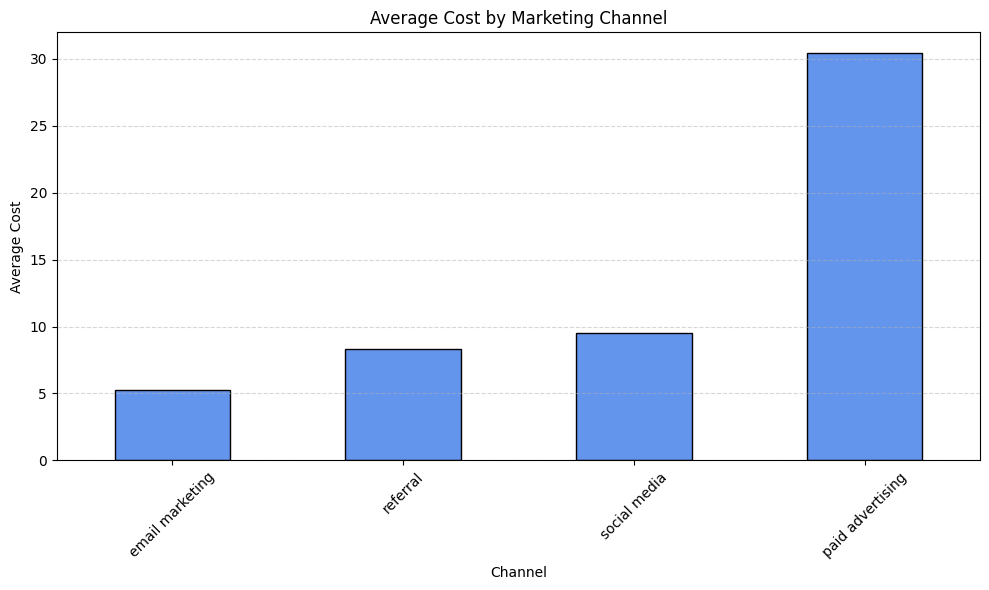

In [90]:
avg_cost = data.groupby('channel')['cost'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_cost.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Average Cost by Marketing Channel')
plt.xlabel('Channel')
plt.ylabel('Average Cost')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### This plot shows the average cost for each marketing channel. Email marketing has the lowest cost, followed by referral and social media with moderate costs. Paid advertising stands out with the highest average cost, nearly triple the others. This helps compare which channels are more budget-friendly and which ones require more spending.

In [91]:
fig = px.box(
    data, x='channel', y='revenue', color='channel',
    title='Revenue Distribution Across Marketing Channels'
)
fig.show()


### This plot shows how revenue is spread out for each marketing channel. Each colored box represents the typical range of earnings for that channel, with the line inside showing the middle value (median). All four channels—referral, paid advertising, email marketing, and social media—have similar revenue distributions, suggesting they perform similarly in terms of how much money they bring in. This helps compare how consistent and balanced each channel is when it comes to generating revenue.

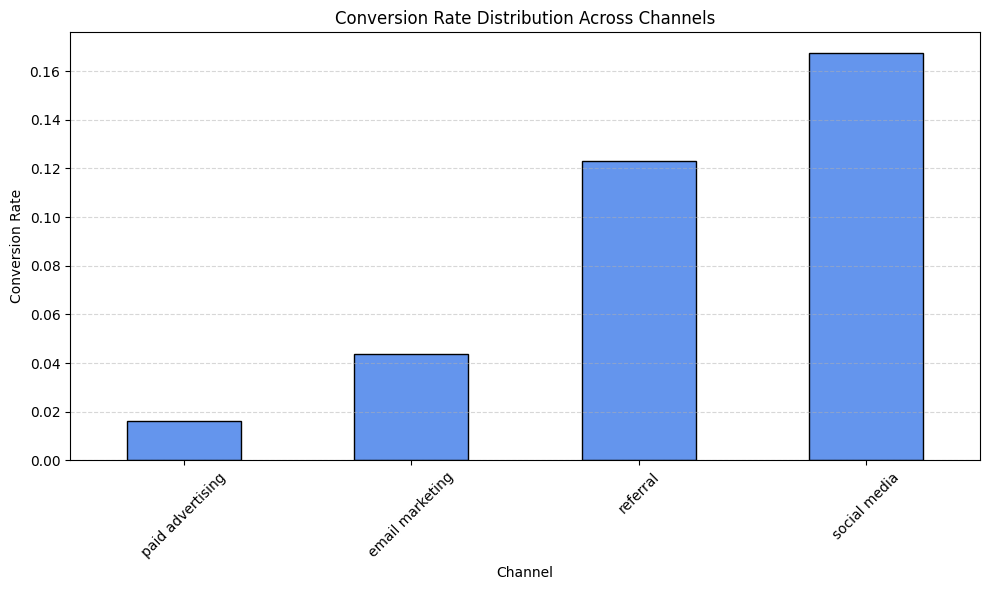

In [92]:
avg_cost = data.groupby('channel')['conversion_rate'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_cost.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Conversion Rate Distribution Across Channels')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### This plot shows the conversion rate for each marketing channel. Paid advertising has the lowest rate, followed by email marketing. Referral performs better, and social media has the highest conversion rate overall. This means social media is the most effective at turning visitors into customers, while paid advertising is the least effective. The chart helps compare which channels are best at getting people to take action.

In [93]:
channel_revenue = data.groupby('channel')['revenue'].sum().reset_index()

fig = px.bar(
    channel_revenue, x='channel', y='revenue', color='channel',
    title='Total Revenue by Marketing Channel'
)
fig.show()

### This plot shows how much total revenue each marketing channel brings in. Email marketing earns the most, followed by paid advertising and referral, which are close in value. Social media generates the least revenue among the four. The chart helps compare which channels are most successful at bringing in money overall.

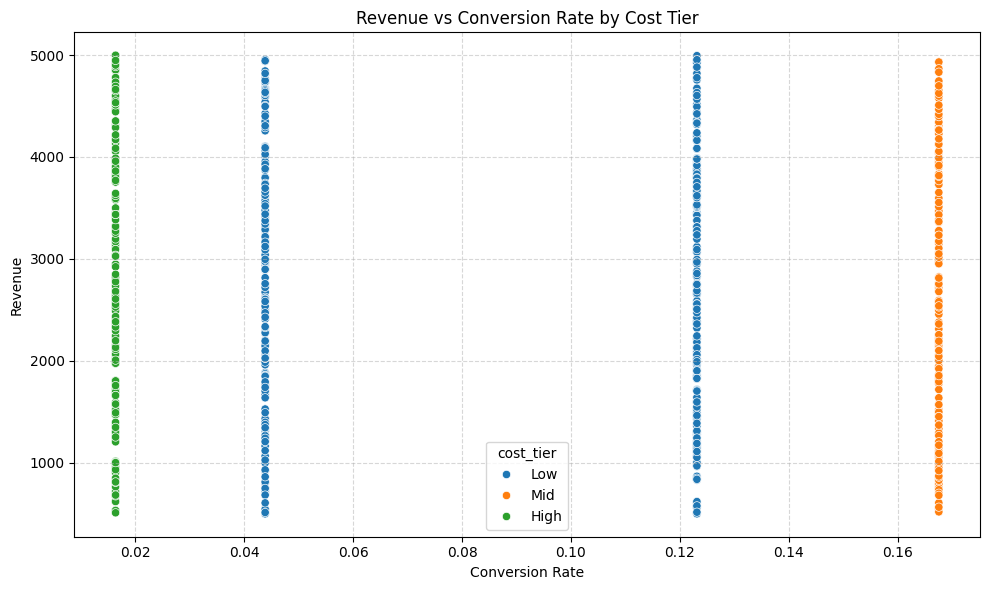

In [94]:
data['cost_tier'] = pd.qcut(
    data['cost'], q=4,
    labels=['Low', 'Mid', 'High'],
    duplicates='drop'
)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='conversion_rate', y='revenue', hue='cost_tier')
plt.title('Revenue vs Conversion Rate by Cost Tier')
plt.xlabel('Conversion Rate')
plt.ylabel('Revenue')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### This plot shows how revenue relates to conversion rate across different cost tiers. Each point represents a customer, and the colors show whether they fall into a low, mid, or high cost group. Customers in the high cost tier tend to have the highest conversion rates, while those in the low cost tier have the lowest. However, revenue is spread fairly evenly across all tiers. This means spending more may improve conversion, but doesn’t always lead to higher revenue, so balancing cost and conversion efficiency is key.

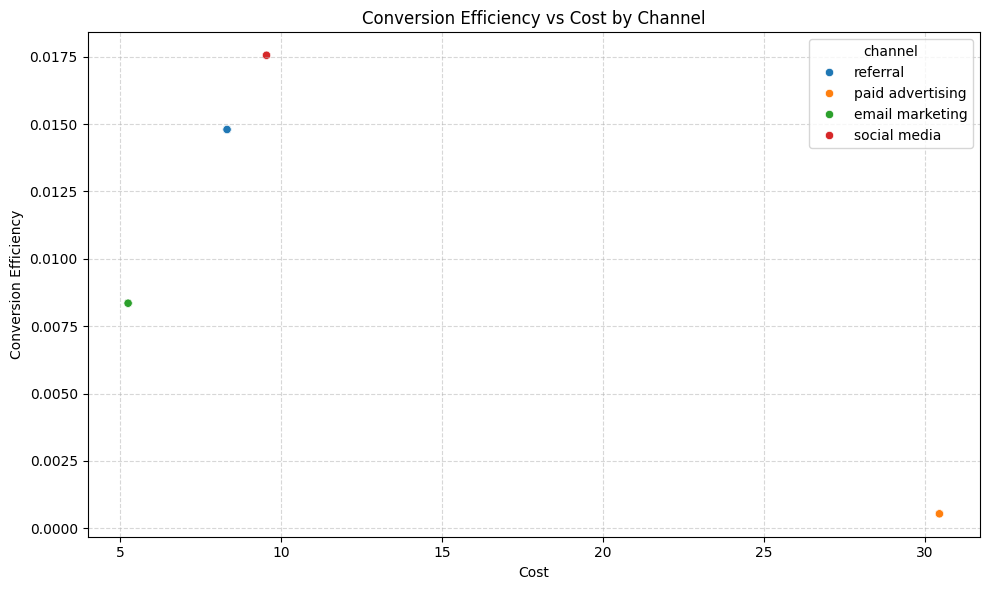

In [95]:
data['conversion_efficiency'] = data['conversion_rate'] / data['cost']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='cost', y='conversion_efficiency', hue='channel')
plt.title('Conversion Efficiency vs Cost by Channel')
plt.xlabel('Cost')
plt.ylabel('Conversion Efficiency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### This plot shows how each marketing channel performs in terms of cost and conversion efficiency. Conversion efficiency here likely means how well each dollar spent turns into customer actions. Referral has low cost and moderate efficiency, making it a solid option. Email marketing also has low cost but lower efficiency. Paid advertising stands out for having the highest cost and the lowest efficiency, meaning it’s the least cost-effective. Social media, on the other hand, has moderate cost but the highest conversion efficiency, making it the most effective channel overall. This chart helps identify which channels give the best results for the money spent.

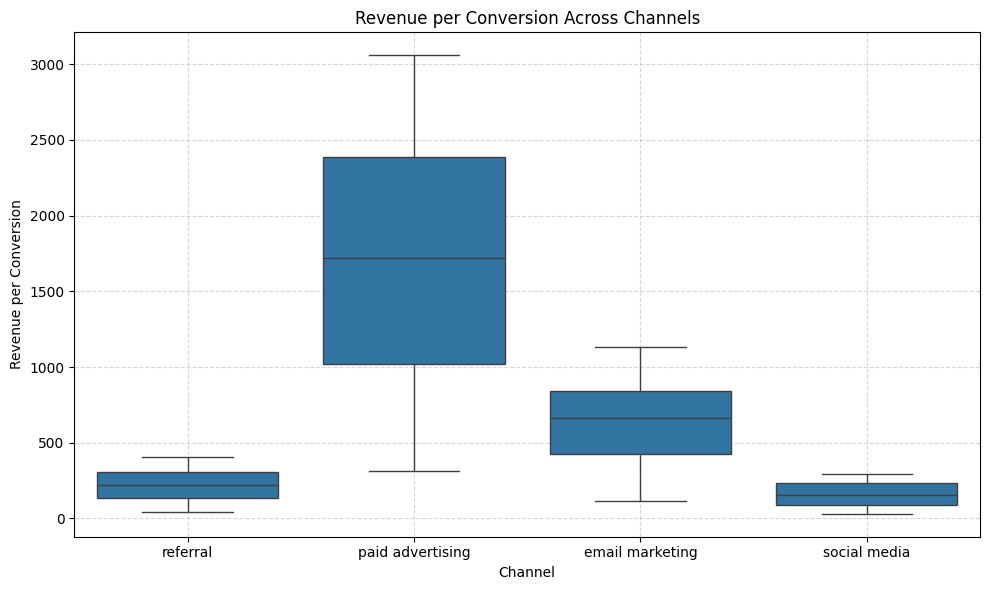

In [96]:
data['revenue_per_conversion'] = data['revenue'] / (data['conversion_rate'] * 100)

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='channel', y='revenue_per_conversion')
plt.title('Revenue per Conversion Across Channels')
plt.xlabel('Channel')
plt.ylabel('Revenue per Conversion')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### This plot shows how much revenue is earned for each conversion across different marketing channels. Paid advertising stands out with the highest and most variable revenue per conversion, meaning it can bring in big returns but is less predictable. Email marketing has a moderate and steady range, offering reliable performance. Referral and social media both show lower and more consistent revenue per conversion, suggesting they’re less profitable but more stable. This chart helps identify which channels are more likely to deliver high-value conversions and which ones offer consistent but smaller returns.

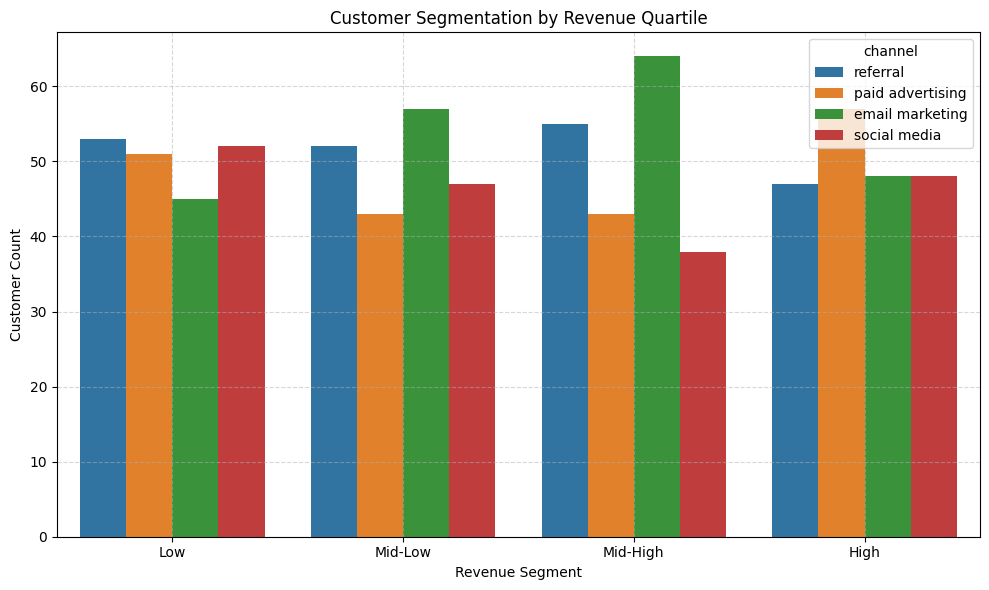

In [97]:
data['revenue_segment'] = pd.qcut(data['revenue'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='revenue_segment', hue='channel')
plt.title('Customer Segmentation by Revenue Quartile')
plt.xlabel('Revenue Segment')
plt.ylabel('Customer Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### This plot shows how customers are spread across different revenue levels for each marketing channel. In the low revenue segment, referral and email marketing attract the most customers. In the mid-low segment, paid advertising leads in customer count. For mid-high revenue, email marketing has the highest number of customers. In the high revenue segment, social media stands out with the most customers. This means different channels perform better at different revenue levels, and choosing the right channel depends on the kind of customer value you're aiming for.**bold text**

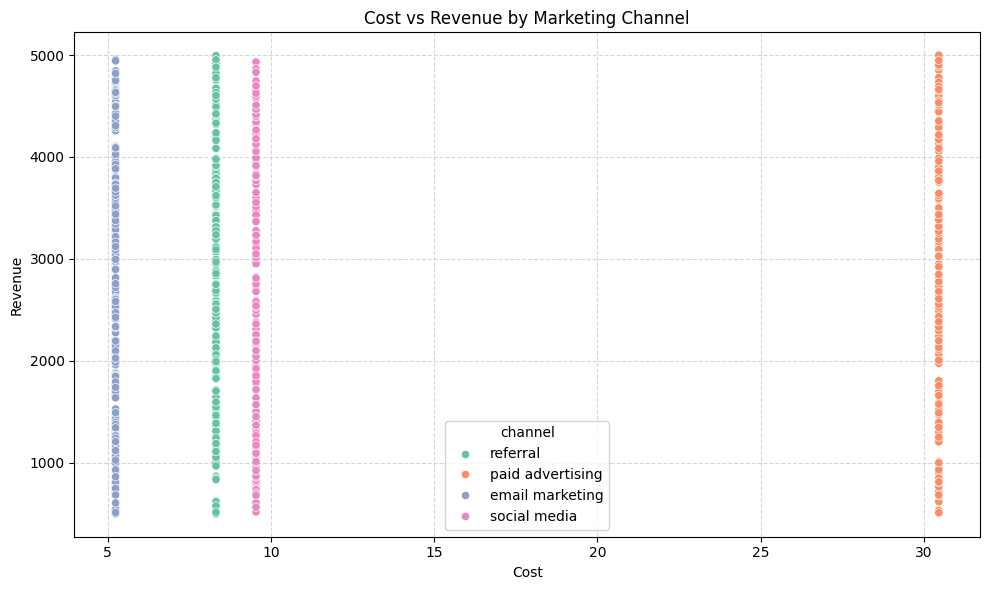

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='cost', y='revenue', hue='channel', palette='Set2')
plt.title('Cost vs Revenue by Marketing Channel')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### This plot shows how cost relates to revenue for each marketing channel. Each group of dots represents a different channel, and they’re lined up vertically, meaning the cost for each channel stays about the same while the revenue varies. Referral has the lowest cost, followed by paid advertising, email marketing, and social media, which has the highest cost. Despite these differences in cost, all channels show a wide range of revenue outcomes. This suggests that spending more doesn’t always guarantee higher revenue, and some lower-cost channels might still perform very well.

## Create the CLV feature and study its relation

In [99]:
data['CLV'] = data['revenue'] - data['cost']

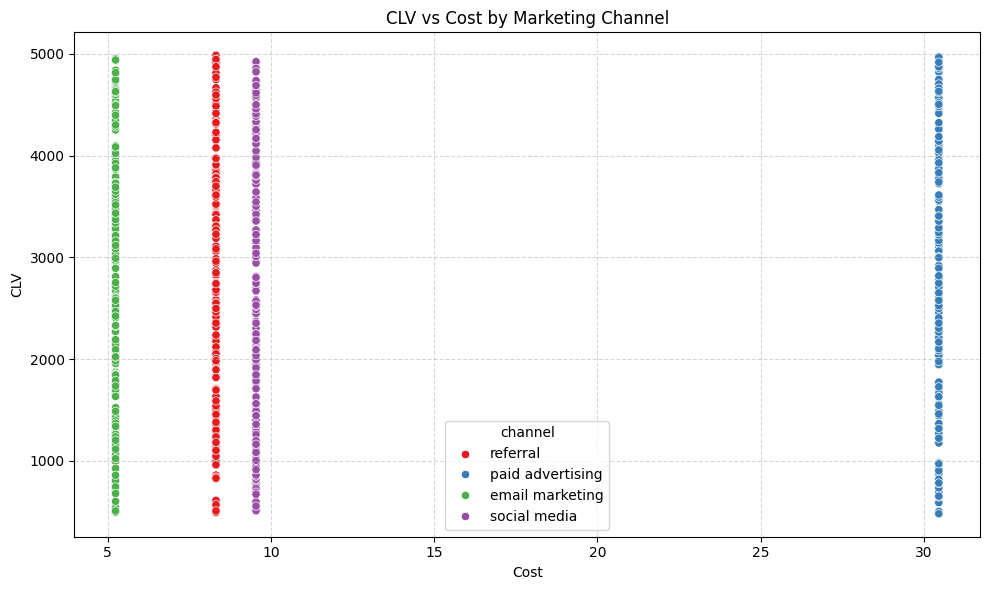

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='cost', y='CLV', hue='channel', palette='Set1')
plt.title('CLV vs Cost by Marketing Channel')
plt.xlabel('Cost')
plt.ylabel('CLV')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### This plot shows how Customer Lifetime Value (CLV) compares to cost across different marketing channels. Each group of dots represents a channel, and they’re lined up vertically, meaning the cost for each channel stays fixed while CLV varies. Referral has the lowest cost and a wide range of CLV, suggesting strong potential at low spend. Paid advertising has a higher cost and also shows a wide CLV range, but it’s less efficient given the spend. Email marketing and social media fall in between, with moderate costs and varied CLV. Overall, this chart helps identify which channels deliver the most long-term value for the money spent.

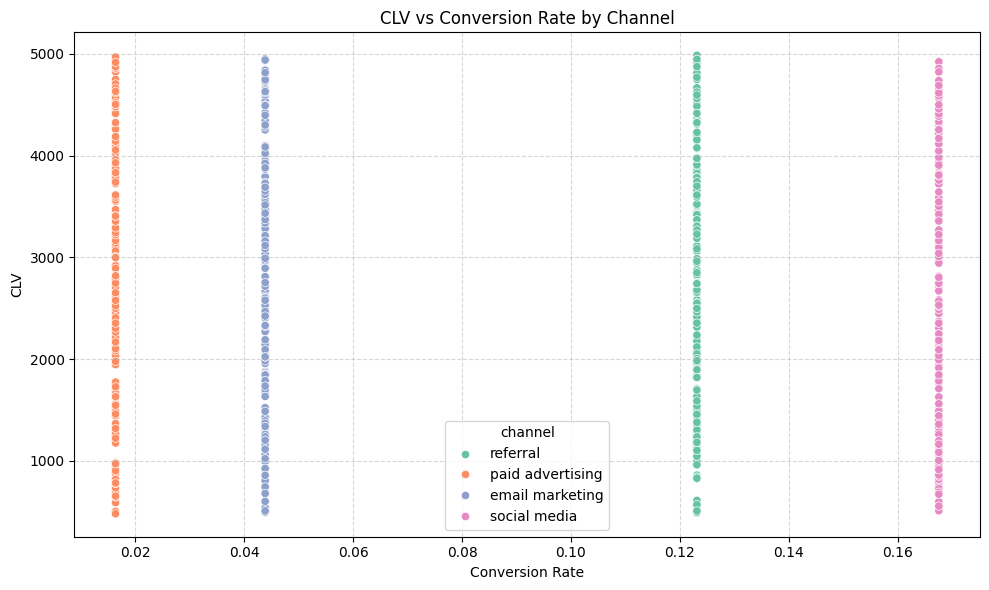

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='conversion_rate', y='CLV', hue='channel', palette='Set2')
plt.title('CLV vs Conversion Rate by Channel')
plt.xlabel('Conversion Rate')
plt.ylabel('CLV')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### This plot shows how Customer Lifetime Value (CLV) compares to conversion rate across different marketing channels. Each group of dots represents a channel, and they’re lined up vertically, meaning each channel has a fixed conversion rate but a wide range of CLV values. Social media has the highest conversion rate, followed by referral, email marketing, and paid advertising. Despite these differences, all channels show varied CLV, meaning even channels with lower conversion rates can still bring in high-value customers. This helps highlight which channels are more efficient at turning conversions into long-term value.

/tmp/ipython-input-1247880273.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




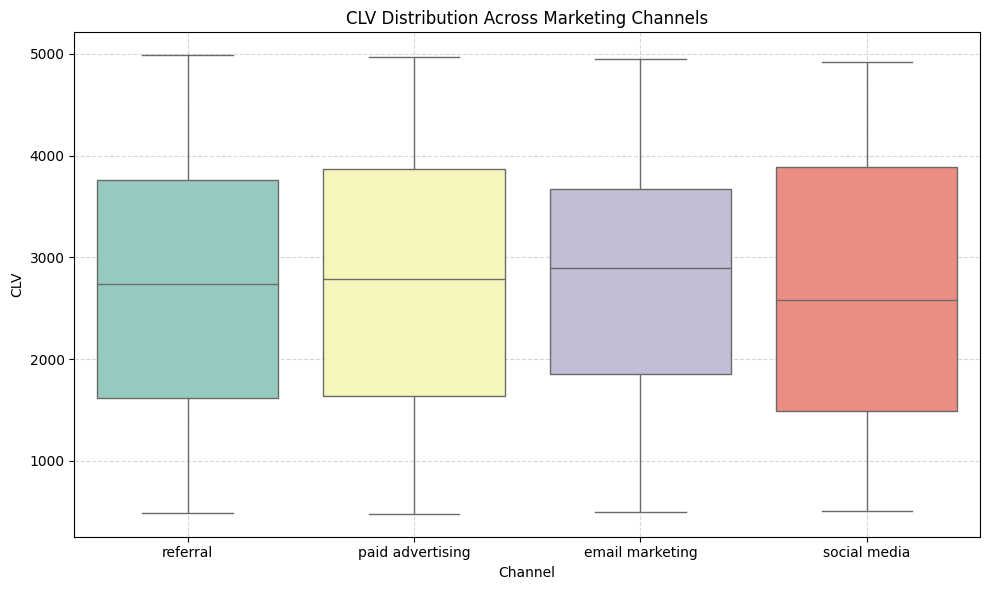

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='channel', y='CLV', palette='Set3')
plt.title('CLV Distribution Across Marketing Channels')
plt.xlabel('Channel')
plt.ylabel('CLV')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### This plot shows how Customer Lifetime Value (CLV) is spread out across different marketing channels. Each box represents the typical range of CLV for a channel, with the line inside showing the middle value (median). Paid advertising has the widest range and highest median CLV, meaning it can bring in high-value customers but with more variation. Email marketing and referral have moderate CLV ranges, offering steady performance. Social media shows the lowest and most consistent CLV, suggesting it’s less profitable but predictable. This chart helps compare which channels are best for attracting long-term, high-value customers.

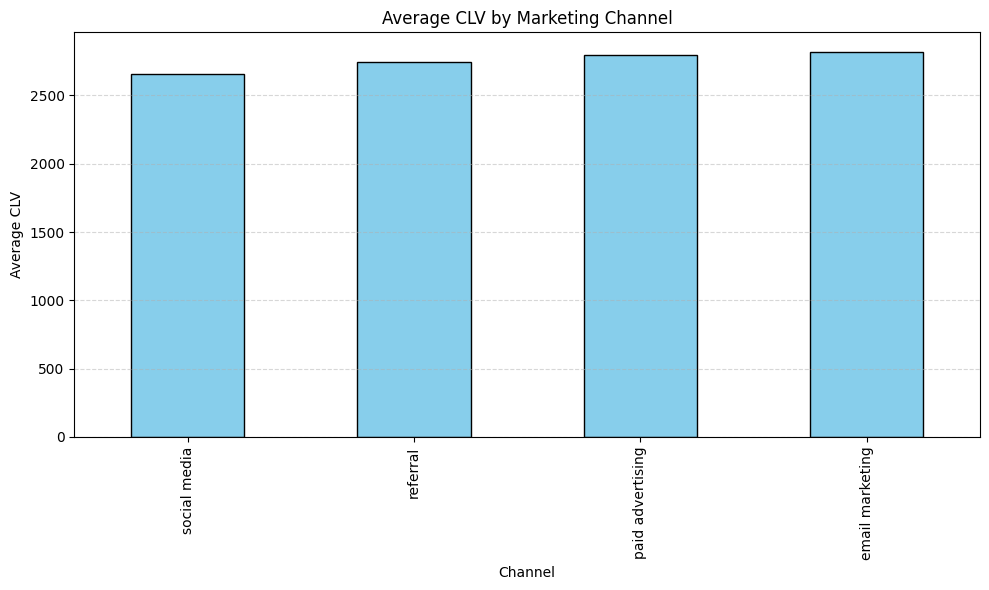

In [103]:
avg_clv = data.groupby('channel')['CLV'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_clv.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average CLV by Marketing Channel')
plt.xlabel('Channel')
plt.ylabel('Average CLV')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### This plot shows the average Customer Lifetime Value (CLV) for each marketing channel. All four channels—social media, referral, paid advertising, and email marketing—have nearly the same average CLV, around 2700. This means that, on average, each channel brings in customers who generate similar long-term value. So while other factors like cost or conversion rate might differ, in terms of lifetime value, all channels perform equally well.

In [104]:
data.head()

,customer_id,channel,cost,conversion_rate,revenue,cost_tier,conversion_efficiency,revenue_per_conversion,revenue_segment,CLV
0,1,referral,8.320327,0.123145,4199,Low,0.014800,340.980204,High,4190.679673
1,2,paid advertising,30.450327,0.016341,3410,High,0.000537,2086.712823,Mid-High,3379.549673
2,3,email marketing,5.246263,0.043822,3164,Low,0.008353,722.008009,Mid-High,3158.753737
3,4,social media,9.546326,0.167592,1520,Mid,0.017556,90.696319,Low,1510.453674
4,5,referral,8.320327,0.123145,2419,Low,0.014800,196.435131,Mid-Low,2410.679673


In [105]:
data.describe()

,customer_id,cost,conversion_rate,revenue,conversion_efficiency,revenue_per_conversion,CLV
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250,0.010254,686.528781,2756.003198
std,231.0844,9.922337,0.059611,1259.543706,0.006449,750.047196,1259.397812
min,1.0000,5.246263,0.016341,500.000000,0.000537,30.968020,479.549673
25%,200.7500,5.246263,0.043822,1694.000000,0.008353,180.150649,1681.100689
50%,400.5000,8.320327,0.043822,2764.000000,0.008353,331.519810,2754.103706
75%,600.2500,9.546326,0.123145,3824.250000,0.014800,896.748095,3809.227674
max,800.0000,30.450327,0.167592,4998.000000,0.017556,3058.472343,4985.679673


In [106]:
data['channel'].value_counts()

,count
channel,
email marketing,214
referral,207
paid advertising,194
social media,185


In [107]:
data = pd.get_dummies(data, columns=['channel'], drop_first=False)

In [108]:
data.head()

,customer_id,cost,conversion_rate,revenue,cost_tier,conversion_efficiency,revenue_per_conversion,revenue_segment,CLV,channel_email marketing,channel_paid advertising,channel_referral,channel_social media
0,1,8.320327,0.123145,4199,Low,0.014800,340.980204,High,4190.679673,False,False,True,False
1,2,30.450327,0.016341,3410,High,0.000537,2086.712823,Mid-High,3379.549673,False,True,False,False
2,3,5.246263,0.043822,3164,Low,0.008353,722.008009,Mid-High,3158.753737,True,False,False,False
3,4,9.546326,0.167592,1520,Mid,0.017556,90.696319,Low,1510.453674,False,False,False,True
4,5,8.320327,0.123145,2419,Low,0.014800,196.435131,Mid-Low,2410.679673,False,False,True,False


In [109]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Low', 'Mid', 'High']])
data[['cost_tier']] = encoder.fit_transform(data[['cost_tier']])

encoder2 = OrdinalEncoder(categories=[['Low', 'Mid-Low', 'Mid-High', 'High']])
data[['revenue_segment']] = encoder2.fit_transform(data[['revenue_segment']])

In [110]:
data.head()

,customer_id,cost,conversion_rate,revenue,cost_tier,conversion_efficiency,revenue_per_conversion,revenue_segment,CLV,channel_email marketing,channel_paid advertising,channel_referral,channel_social media
0,1,8.320327,0.123145,4199,0.0,0.014800,340.980204,3.0,4190.679673,False,False,True,False
1,2,30.450327,0.016341,3410,2.0,0.000537,2086.712823,2.0,3379.549673,False,True,False,False
2,3,5.246263,0.043822,3164,0.0,0.008353,722.008009,2.0,3158.753737,True,False,False,False
3,4,9.546326,0.167592,1520,1.0,0.017556,90.696319,0.0,1510.453674,False,False,False,True
4,5,8.320327,0.123145,2419,0.0,0.014800,196.435131,1.0,2410.679673,False,False,True,False


In [111]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['CLV'])  # Features
y = data['CLV']                 # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
X_train.shape

(640, 12)

In [113]:
X_test.shape

(160, 12)

In [114]:
 y_train.shape

(640,)

In [115]:
y_test.shape

(160,)

# **XGB Regressor**

In [116]:
from xgboost import XGBRegressor

# Initialize model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on training and testing sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_accuracy = train_r2 * 100

# Testing metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_accuracy = test_r2 * 100

# Print results
print("Training Set Evaluation:")
print(f"MAE: {train_mae:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R² Score: {train_r2:.2f}")
print(f"Accuracy (R² %): {train_accuracy:.2f}%\n")

print("Testing Set Evaluation:")
print(f"MAE: {test_mae:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R² Score: {test_r2:.2f}")
print(f"Accuracy (R² %): {test_accuracy:.2f}%")


Training Set Evaluation:
MAE: 4.17
RMSE: 5.47
R² Score: 1.00
Accuracy (R² %): 100.00%

Testing Set Evaluation:
MAE: 10.61
RMSE: 13.89
R² Score: 1.00
Accuracy (R² %): 99.99%


In [118]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)

Cross-validated R² scores: [0.99987436 0.99988903 0.99989208 0.99987218 0.99984576]


# **Random Forest Regressor**

In [119]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [120]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_accuracy = train_r2 * 100

# Testing metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_accuracy = test_r2 * 100

# Print results
print("🔹 Training Set Evaluation:")
print(f"MAE: {train_mae:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R² Score: {train_r2:.2f}")
print(f"Accuracy (R² %): {train_accuracy:.2f}%\n")

print("🔹 Testing Set Evaluation:")
print(f"MAE: {test_mae:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R² Score: {test_r2:.2f}")
print(f"Accuracy (R² %): {test_accuracy:.2f}%")


🔹 Training Set Evaluation:
MAE: 3.46
RMSE: 4.64
R² Score: 1.00
Accuracy (R² %): 100.00%

🔹 Testing Set Evaluation:
MAE: 9.71
RMSE: 12.33
R² Score: 1.00
Accuracy (R² %): 99.99%


In [124]:
data.drop(columns=['customer_id'], inplace=True)

In [125]:
data.select_dtypes(include='number').head()

,cost,conversion_rate,revenue,cost_tier,conversion_efficiency,revenue_per_conversion,revenue_segment,CLV
0,8.320327,0.123145,4199,0.0,0.014800,340.980204,3.0,4190.679673
1,30.450327,0.016341,3410,2.0,0.000537,2086.712823,2.0,3379.549673
2,5.246263,0.043822,3164,0.0,0.008353,722.008009,2.0,3158.753737
3,9.546326,0.167592,1520,1.0,0.017556,90.696319,0.0,1510.453674
4,8.320327,0.123145,2419,0.0,0.014800,196.435131,1.0,2410.679673


In [126]:
data.describe(include='number')

,cost,conversion_rate,revenue,cost_tier,conversion_efficiency,revenue_per_conversion,revenue_segment,CLV
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,13.148052,0.086305,2769.151250,0.716250,0.010254,686.528781,1.498750,2756.003198
std,9.922337,0.059611,1259.543706,0.830119,0.006449,750.047196,1.119851,1259.397812
min,5.246263,0.016341,500.000000,0.000000,0.000537,30.968020,0.000000,479.549673
25%,5.246263,0.043822,1694.000000,0.000000,0.008353,180.150649,0.000000,1681.100689
50%,8.320327,0.043822,2764.000000,0.000000,0.008353,331.519810,1.500000,2754.103706
75%,9.546326,0.123145,3824.250000,1.000000,0.014800,896.748095,2.250000,3809.227674
max,30.450327,0.167592,4998.000000,2.000000,0.017556,3058.472343,3.000000,4985.679673


In [127]:
from sklearn.preprocessing import StandardScaler

num_cols = X.select_dtypes(include=["int64","float64"]).columns

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_test[num_cols] = scaler.transform(X_test[num_cols])

In [129]:
data.describe(include='number')

,cost,conversion_rate,revenue,cost_tier,conversion_efficiency,revenue_per_conversion,revenue_segment,CLV
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,13.148052,0.086305,2769.151250,0.716250,0.010254,686.528781,1.498750,2756.003198
std,9.922337,0.059611,1259.543706,0.830119,0.006449,750.047196,1.119851,1259.397812
min,5.246263,0.016341,500.000000,0.000000,0.000537,30.968020,0.000000,479.549673
25%,5.246263,0.043822,1694.000000,0.000000,0.008353,180.150649,0.000000,1681.100689
50%,8.320327,0.043822,2764.000000,0.000000,0.008353,331.519810,1.500000,2754.103706
75%,9.546326,0.123145,3824.250000,1.000000,0.014800,896.748095,2.250000,3809.227674
max,30.450327,0.167592,4998.000000,2.000000,0.017556,3058.472343,3.000000,4985.679673


# **Linear Regression**

In [130]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

In [131]:
# Fit the model on scaled training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [132]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [133]:
coef_table = pd.Series(lr_model.coef_, index=X_train.columns).sort_values(ascending=False)
print("Intercept:", lr_model.intercept_)
print(coef_table.head(20))

Intercept: 2784.951197469705
revenue                     1.250758e+03
channel_email marketing     2.381417e+00
conversion_efficiency       1.634501e+00
channel_social media        7.364110e-01
conversion_rate             3.711350e-01
revenue_segment             5.684342e-14
customer_id                -6.871817e-14
revenue_per_conversion     -2.842171e-13
channel_referral           -1.448280e+00
channel_paid advertising   -1.669548e+00
cost_tier                  -3.160784e+00
cost                       -4.412102e+00
dtype: float64


In [137]:
y_pred = lr_model.predict(X_test)

In [138]:
comparison_df = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": y_pred
})

# Reset index so rows align nicely
comparison_df = comparison_df.reset_index(drop=True)

# Absolute difference
comparison_df["Difference"] = abs(comparison_df["Actual Price"] - comparison_df["Predicted Price"])

# Percentage error
comparison_df["% Error"] = (comparison_df["Difference"] / comparison_df["Actual Price"]) * 100

# Format display
pd.options.display.float_format = '{:,.2f}'.format

# Show first 10 rows
print(comparison_df.head(10))

   Actual Price  Predicted Price  Difference  % Error
0      2,848.68         2,848.68        0.00     0.00
1      1,163.45         1,163.45        0.00     0.00
2      4,121.45         4,121.45        0.00     0.00
3      2,463.68         2,463.68        0.00     0.00
4      2,498.55         2,498.55        0.00     0.00
5      4,118.45         4,118.45        0.00     0.00
6      3,206.75         3,206.75        0.00     0.00
7      3,159.75         3,159.75        0.00     0.00
8      4,458.45         4,458.45        0.00     0.00
9      4,484.68         4,484.68        0.00     0.00


In [140]:
# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_accuracy = train_r2 * 100

# Testing metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_accuracy = test_r2 * 100

# Print results
print("Training Set Evaluation:")
print(f"MAE: {train_mae:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R² Score: {train_r2:.2f}")
print(f"Accuracy (R² %): {train_accuracy:.2f}%\n")

print("Testing Set Evaluation:")
print(f"MAE: {test_mae:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R² Score: {test_r2:.2f}")
print(f"Accuracy (R² %): {test_accuracy:.2f}%")

Training Set Evaluation:
MAE: 0.00
RMSE: 0.00
R² Score: 1.00
Accuracy (R² %): 100.00%

Testing Set Evaluation:
MAE: 0.00
RMSE: 0.00
R² Score: 1.00
Accuracy (R² %): 100.00%


In [142]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.0 MB/s eta 0:00:00


In [148]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np

import joblib

# After training your model
joblib.dump(xgb_model, "xgb_model.pkl")
# Load trained model
model = joblib.load("xgb_model.pkl")  # Make sure this file exists

# Optional: load scaler if used
# scaler = joblib.load("scaler.pkl"

2025-09-30 13:45:20.539 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 13:45:20.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 13:45:20.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 13:45:20.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 13:45:20.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 13:45:20.544 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 13:45:20.545 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 13:45:20.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar